In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('Datasets/heart.csv')
X = np.array(df.loc[:,df.columns != 'output'])
y = np.array(df.loc[:,df.columns == 'output'])

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [5]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [133]:
class NN:
        
    def __init__(self, LR, X_train, y_train, X_test, y_test):
        self.w = np.random.randn(X_train.shape[1])
        self.b = np.random.randn()
        self.LR = LR
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.L_train = []
        self.L_test = []
        
    def activation(self, x):
        # sigmoid in our case
        return 1 / (1 + np.exp(-x))

    def dactivation(self, x):
        # derivative of sigmoid
        return self.activation(x) * (1 - self.activation(x))

    def forward(self, X):
        hidden_1 = np.dot(X, self.w) + self.b
        activate_1 = self.activation(hidden_1)
        return activate_1
    
    def backward(self, X, y_true):
        # calc gradients
        hidden_1 = np.dot(X, self.w) + self.b
        y_pred = self.forward(X)
        dL_dpred = 2 * (y_pred - y_true)
        dpred_dhidden1 = self.dactivation(hidden_1)
        dhidden1_db = 1
        dhidden1_dw = X

        dL_db = dL_dpred * dpred_dhidden1 * dhidden1_db
        dL_dw = dL_dpred * dpred_dhidden1 * dhidden1_dw
        return dL_db, dL_dw

    def optimizer(self, dL_db, dL_dw):
        # update weights
        self.b = self.b - dL_db * self.LR
        self.w = self.w - dL_dw * self.LR
        
    def train(self, ITERATIONS):
        for i in range(ITERATIONS):
            # random position
            random_pos = np.random.randint(len(self.X_train))
            
            # forward pass
            y_train_true = self.y_train[random_pos]
            y_train_pred = self.forward(self.X_train[random_pos])
            
            # calc training loss
            L = np.sum(np.square(y_train_pred - y_train_true))
            self.L_train.append(L)
            
            # calc gradients
            dL_db, dL_dw = self.backward(
                self.X_train[random_pos], self.y_train[random_pos]
            )
            # update weights
            self.optimizer(dL_db, dL_dw)

            # calc error at every epoch end
            L_sum = 0
            for j in range(len(self.X_test)):
                y_true = self.y_test[j]
                y_pred = self.forward(self.X_test[j])
                L_sum += np.square(y_pred - y_true)
            self.L_test.append(L_sum)

        return "training successfully finished"

            
            


In [134]:
lr = 0.1
iterations = 1000


In [135]:
nn = NN(lr,X_train_scale,y_train,X_test_scale,y_test)
nn.train(iterations)


'training successfully finished'

In [136]:
nn.L_test

[array([24.95221494]),
 array([24.94504497]),
 array([24.89101421]),
 array([24.81242588]),
 array([24.55466881]),
 array([24.01009072]),
 array([23.96065321]),
 array([23.99605375]),
 array([23.47071478]),
 array([23.30105131]),
 array([23.31238164]),
 array([23.1258722]),
 array([23.42076402]),
 array([23.38116538]),
 array([23.45653585]),
 array([22.96028959]),
 array([22.82990128]),
 array([22.66645117]),
 array([22.66655015]),
 array([22.6658434]),
 array([22.66585377]),
 array([21.87335192]),
 array([22.24036807]),
 array([22.22848581]),
 array([22.16259104]),
 array([22.16216648]),
 array([22.15503871]),
 array([22.15633606]),
 array([22.44473754]),
 array([22.4447298]),
 array([22.26814754]),
 array([22.42441278]),
 array([22.06370519]),
 array([21.89129151]),
 array([21.89128281]),
 array([21.83286299]),
 array([21.74736454]),
 array([21.63371104]),
 array([21.51305995]),
 array([21.51300412]),
 array([21.50991418]),
 array([21.50937126]),
 array([21.50929785]),
 array([21.387

In [137]:
lst = []
for i,j in enumerate(nn.L_test):
    lst.append(nn.L_test[i][0])

In [138]:
lst1 = []
for i,j in enumerate(nn.L_train):
    lst1.append(nn.L_train[i])

<AxesSubplot:>

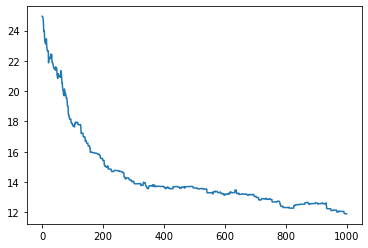

In [139]:
sns.lineplot(x=list(range(len(nn.L_test))), y=lst)

In [140]:
total = X_test_scale.shape[0]
correct = 0
y_preds = []
for i in range(total):
    y_true = y_test[i]
    y_pred = np.round(nn.forward(X_test_scale[i]))
    y_preds.append(y_pred)
    correct += 1 if y_true == y_pred else 0

In [141]:
acc = correct / total
acc

0.7377049180327869

In [142]:
confusion_matrix(y_true = y_test, y_pred = y_preds)

array([[19, 11],
       [ 5, 26]], dtype=int64)